In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans

In [2]:
gdf1 = gpd.read_file(r"C:\Users\bruno\Documents\Studentassistent\Student-assistent\BuurtenWijkenGemeentes\Gemeentes\zonderwatergemeente.json")
gdf1

,GM_CODE,GM_NAAM,WATER,OAD,STED,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,P_15_24_JR,...,P_HH_M_K,GEM_HH_GR,P_WEST_AL,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,geometry
0,GM0003,Appingedam,NEE,1051,3,11801,5751,6050,15,10,...,31,2.1,7,7,0,1,1,2,3,"POLYGON ((6.88738 53.29788, 6.88371 53.29747, ..."
1,GM0005,Bedum,NEE,685,4,10475,5235,5240,16,11,...,36,2.3,4,3,0,0,0,0,3,"POLYGON ((6.59583 53.34714, 6.60145 53.34042, ..."
2,GM0009,Ten Boer,NEE,372,5,7292,3616,3676,18,12,...,39,2.4,4,3,0,0,0,0,2,"POLYGON ((6.77253 53.28309, 6.74394 53.27281, ..."
3,GM0010,Delfzijl,NEE,677,4,24864,12475,12389,14,11,...,31,2.1,8,10,0,3,1,2,4,"MULTIPOLYGON (((7.10109 53.32628, 7.10109 53.3..."
4,GM0014,Groningen,NEE,3456,1,202810,101299,101511,12,24,...,18,1.6,12,12,1,2,2,1,8,"POLYGON ((6.63504 53.25128, 6.63778 53.24605, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,GM1948,Meierijstad,NEE,970,4,80148,40252,39896,16,12,...,38,2.3,7,6,1,0,1,2,3,"POLYGON ((5.42339 51.65378, 5.46514 51.64312, ..."
376,GM1949,Waadhoeke,NEE,470,5,46112,23455,22657,16,11,...,34,2.2,5,3,0,0,0,0,3,"POLYGON ((5.73538 53.29472, 5.73035 53.29430, ..."
377,GM1950,Westerwolde,NEE,286,5,24684,12368,12316,14,10,...,30,2.2,6,3,0,0,0,0,2,"POLYGON ((7.18924 53.15488, 7.18960 53.14796, ..."
378,GM1952,Midden-Groningen,NEE,862,4,60951,30560,30391,15,11,...,33,2.2,6,8,0,1,2,2,3,"POLYGON ((6.91134 53.24302, 6.91020 53.23757, ..."


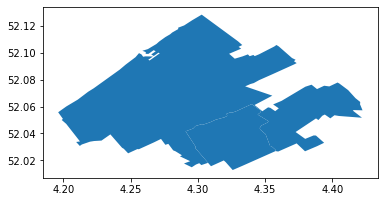

In [3]:
#Querying all municipalities that I want to analyse. 
gdf2 = gdf1[gdf1['GM_NAAM'].isin(["'s-Gravenhage", "Rijswijk"])]
gdf2.plot()

In [4]:
gdf3 = gdf2.dissolve(by='WATER', aggfunc = 'sum')

In [5]:
gdf3.to_file('DenhaagRijswijk.shp')

In [7]:
Housepoints = gpd.read_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\Huizenindenhaagrijswijkdelftaspoints.shp")
Housepoints

,osm_id,code,fclass,name,type,geometry
0,32017871,1500,building,None,apartments,POINT (4.37140 51.99724)
1,32017872,1500,building,None,apartments,POINT (4.37188 51.99654)
2,32017873,1500,building,None,apartments,POINT (4.37164 51.99689)
3,37774391,1500,building,The Hague Tower,apartments,POINT (4.32422 52.07158)
4,44338402,1500,building,Studentenhuisvesting Krakeelhof,apartments,POINT (4.35097 52.00222)
...,...,...,...,...,...,...
176188,794552948,1500,building,None,house,POINT (4.36237 51.99356)
176189,794552949,1500,building,None,house,POINT (4.36244 51.99297)
176190,794552950,1500,building,None,house,POINT (4.36285 51.99325)
176191,794552951,1500,building,None,house,POINT (4.36222 51.99340)


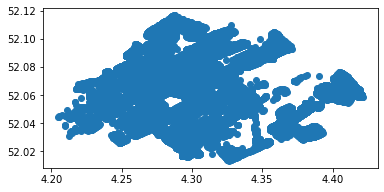

In [10]:
huizendenhaag = gpd.clip(Housepoints, gdf3)
huizendenhaag.plot()

In [11]:
huizendenhaag

,osm_id,code,fclass,name,type,geometry
3,37774391,1500,building,The Hague Tower,apartments,POINT (4.32422 52.07158)
61,58350937,1500,building,None,house,POINT (4.31950 52.01977)
62,58570300,1500,building,Weth. Brederode-flat,apartments,POINT (4.31361 52.03087)
63,58570301,1500,building,Burg. Bogaardt-flat,apartments,POINT (4.31348 52.03155)
64,58570732,1500,building,None,apartments,POINT (4.31052 52.04305)
...,...,...,...,...,...,...
176086,772533010,1500,building,None,apartments,POINT (4.27449 52.05066)
176087,772538264,1500,building,None,house,POINT (4.29521 52.02842)
176088,772538276,1500,building,None,apartments,POINT (4.28951 52.02775)
176099,772845734,1500,building,None,house,POINT (4.40500 52.06636)


In [16]:
tram = gpd.read_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\shapes.shp")
roads = gpd.read_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\roadsindenhaagrijswijkdelft.shp")
pois =  gpd.read_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\poisindenhaagrijswijkdelft.shp")

In [17]:
tram = gpd.clip(tram, gdf3)
roads = gpd.clip(roads, gdf3)
pois = gpd.clip(pois, gdf3)

C:\Users\bruno\.conda\envs\geopandas1\lib\site-packages\geopandas\geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


In [34]:
long = huizendenhaag.geometry.x
latt = huizendenhaag.geometry.y

df = pd.DataFrame({'name':huizendenhaag['name'],'fclass':huizendenhaag['fclass'],'osm_id':huizendenhaag['osm_id'],'long':long, 'latt':latt})
df

,name,fclass,osm_id,long,latt
3,The Hague Tower,building,37774391,4.324224,52.071575
61,None,building,58350937,4.319504,52.019770
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554
64,None,building,58570732,4.310517,52.043046
...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658
176087,None,building,772538264,4.295209,52.028417
176088,None,building,772538276,4.289508,52.027754
176099,None,building,772845734,4.404999,52.066361


In [36]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=10000, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

MemoryError: Unable to allocate 6.97 GiB for an array with shape (93485, 10000) and data type float64

In [38]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster
3,The Hague Tower,building,37774391,4.324224,52.071575,2
61,None,building,58350937,4.319504,52.019770,6
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,6
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,6
64,None,building,58570732,4.310517,52.043046,6
...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,9
176087,None,building,772538264,4.295209,52.028417,6
176088,None,building,772538276,4.289508,52.027754,6
176099,None,building,772845734,4.404999,52.066361,0


In [42]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=100, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,66,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,91,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,67,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,82,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,98,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,84,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,61,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,37,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,29,POINT (4.40500 52.06636)


In [43]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=500, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,196,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,406,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,261,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,261,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,114,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,2,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,191,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,156,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,327,POINT (4.40500 52.06636)


In [44]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=1000, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,405,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,235,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,494,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,388,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,872,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,971,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,84,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,929,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,574,POINT (4.40500 52.06636)


In [45]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=1500, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,1494,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,950,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,801,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,1225,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,757,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,692,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,956,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,1326,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,781,POINT (4.40500 52.06636)


In [47]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=2000, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,1494,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,950,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,801,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,501,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,1718,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,692,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,956,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,1326,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,1896,POINT (4.40500 52.06636)


In [48]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=2500, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,1494,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,950,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,801,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,501,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,1718,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,692,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,956,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,2433,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,781,POINT (4.40500 52.06636)


In [49]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=3000, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,619,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,2264,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,202,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,715,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,2444,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,1025,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,1980,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,2877,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,1393,POINT (4.40500 52.06636)


In [50]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=4000, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,482,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,775,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,3387,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,587,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,2677,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,3787,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,232,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,1501,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,2067,POINT (4.40500 52.06636)


In [51]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=5000, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,3603,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,1403,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,2226,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,41,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,2210,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,1352,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,4540,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,4346,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,3448,POINT (4.40500 52.06636)


In [52]:
X = df[['long','latt']]
kmeans = KMeans(n_clusters=6000, random_state=0).fit(X)
a = kmeans.labels_
df['cluster'] = a
df

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,3603,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,1403,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,3844,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,41,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,2210,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,1352,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,4540,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,4346,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,3448,POINT (4.40500 52.06636)


In [53]:
gdfq = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.latt))
gdfq

,name,fclass,osm_id,long,latt,cluster,geometry
3,The Hague Tower,building,37774391,4.324224,52.071575,3603,POINT (4.32422 52.07158)
61,None,building,58350937,4.319504,52.019770,1403,POINT (4.31950 52.01977)
62,Weth. Brederode-flat,building,58570300,4.313614,52.030866,3844,POINT (4.31361 52.03087)
63,Burg. Bogaardt-flat,building,58570301,4.313480,52.031554,41,POINT (4.31348 52.03155)
64,None,building,58570732,4.310517,52.043046,2210,POINT (4.31052 52.04305)
...,...,...,...,...,...,...,...
176086,None,building,772533010,4.274492,52.050658,1352,POINT (4.27449 52.05066)
176087,None,building,772538264,4.295209,52.028417,4540,POINT (4.29521 52.02842)
176088,None,building,772538276,4.289508,52.027754,4346,POINT (4.28951 52.02775)
176099,None,building,772845734,4.404999,52.066361,3448,POINT (4.40500 52.06636)


In [61]:
gdfq[gdfq['cluster'] == 5999]

,name,fclass,osm_id,long,latt,cluster,geometry
90094,None,building,264825584,4.338247,52.082235,5999,POINT (4.33825 52.08223)
90125,None,building,264825620,4.338196,52.082282,5999,POINT (4.33820 52.08228)
90133,None,building,264825629,4.338314,52.082190,5999,POINT (4.33831 52.08219)
90136,None,building,264825632,4.337865,52.082579,5999,POINT (4.33786 52.08258)
90259,None,building,264826133,4.337686,52.082210,5999,POINT (4.33769 52.08221)
90267,None,building,264826144,4.337823,52.082092,5999,POINT (4.33782 52.08209)
90272,None,building,264826150,4.338452,52.082051,5999,POINT (4.33845 52.08205)
90289,None,building,264826168,4.337778,52.082131,5999,POINT (4.33778 52.08213)
90290,None,building,264826170,4.337595,52.082289,5999,POINT (4.33759 52.08229)
90292,None,building,264826172,4.337963,52.081972,5999,POINT (4.33796 52.08197)


In [54]:
gdfq.to_file('clustersKmeans.shp')

In [67]:
clusternames = np.linspace(0, 5999, 6000)

In [70]:
clustercenters = kmeans.cluster_centers_
clustercenters

array([[ 4.25957708, 52.04957865],
       [ 4.34364793, 52.05500998],
       [ 4.28046921, 52.08484057],
       ...,
       [ 4.34407742, 52.05897343],
       [ 4.27840149, 52.0643568 ],
       [ 4.33799788, 52.08223067]])

In [82]:
#pd.DataFrame({'name':clusternames, 'clustercenters':clustercenters})
df = pd.DataFrame(clustercenters).rename(columns = {0:'long',1:'latt'})
df1 = pd.DataFrame(clusternames).rename(columns = {0:'clustername'})
df2 = pd.concat([df,df1],axis=1)
df2

,long,latt,clustername
0,4.259577,52.049579,0.0
1,4.343648,52.055010,1.0
2,4.280469,52.084841,2.0
3,4.415055,52.061592,3.0
4,4.300983,52.030873,4.0
...,...,...,...
5995,4.323831,52.041419,5995.0
5996,4.260924,52.078360,5996.0
5997,4.344077,52.058973,5997.0
5998,4.278401,52.064357,5998.0


In [130]:
result = gpd.GeoDataFrame()#columns=['name', 'fclass', 'osm_id', 'long', 'latt', 'cluster', 'longdiff', 'Lattdiff', 'Euclidian'])
for i in clusternames:
    Gebouwen = gdfq[gdfq['cluster'] == i]
    Center = df2[df2['clustername'] == i]
    Clong = float(Center.long)
    Clatt = float(Center.latt)
    Gebouwen['longdiff'] = abs(Clong - Gebouwen['long'])
    Gebouwen['Lattdiff'] = abs(Clatt - Gebouwen['latt'])
    Gebouwen['Euclidian'] = Gebouwen['Lattdiff']**2 + Gebouwen['longdiff']**2
    Gebouwen['Euclidian'] = Gebouwen['Euclidian'].apply(lambda x: math.sqrt(x))
    result = pd.concat([result, Gebouwen[Gebouwen['Euclidian'] == Gebouwen['Euclidian'].min()]])
result

C:\Users\bruno\.conda\envs\geopandas1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\bruno\.conda\envs\geopandas1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bruno\.conda\envs\geopandas1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,name,fclass,osm_id,long,latt,cluster,geometry,longdiff,Lattdiff,Euclidian
161959,None,building,267999488,4.259434,52.049581,0,POINT (4.25943 52.04958),0.000143,0.000003,0.000143
96561,None,building,265070349,4.343525,52.054926,1,POINT (4.34353 52.05493),0.000123,0.000084,0.000149
137057,None,building,267555805,4.280483,52.084788,2,POINT (4.28048 52.08479),0.000014,0.000053,0.000055
67621,None,building,255149925,4.415170,52.061477,3,POINT (4.41517 52.06148),0.000115,0.000116,0.000163
106756,None,building,265477156,4.301079,52.030911,4,POINT (4.30108 52.03091),0.000096,0.000038,0.000103
...,...,...,...,...,...,...,...,...,...,...
116815,None,building,265705659,4.323908,52.041390,5995,POINT (4.32391 52.04139),0.000077,0.000029,0.000082
151199,None,building,267790175,4.261039,52.078407,5996,POINT (4.26104 52.07841),0.000115,0.000047,0.000124
97006,None,building,265071405,4.344107,52.059060,5997,POINT (4.34411 52.05906),0.000030,0.000086,0.000091
136098,None,building,267533186,4.278420,52.064253,5998,POINT (4.27842 52.06425),0.000019,0.000104,0.000105


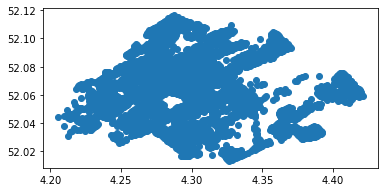

In [131]:
result.plot()

In [132]:
result.to_file('buildingsclosesttocenter.shp')